
# Simple Sentiment Analysis

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Data Acquisition

In [6]:
df=pd.read_csv('./IMDB Dataset.csv')

In [7]:
df.shape

(50000, 2)

In [8]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [9]:
df['sentiment'].value_counts().unique

<bound method Series.unique of sentiment
positive    25000
negative    25000
Name: count, dtype: int64>

In [10]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0)


In [11]:
df['sentiment'].value_counts().unique

<bound method Series.unique of sentiment
1    25000
0    25000
Name: count, dtype: int64>

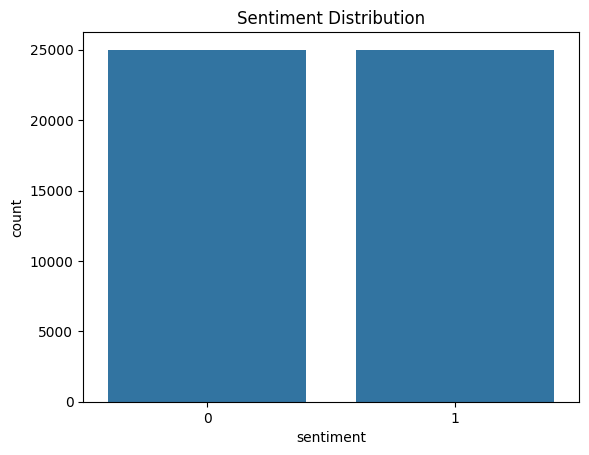

In [12]:
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [13]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## Text Preprocessing

#### Lowercasing

In [14]:
df['review']=df['review'].str.lower()

##### Remove html tags

In [15]:
import re
def remove_html(text):
    pattern=re.compile('<.*>')
    return pattern.sub(r'',text)

In [16]:
df['review']=df['review'].apply(remove_html)

In [17]:
text=df['review'].values
labels=df['sentiment'].values

#### Tokenization

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(text)

##### Convert text to sequences

In [20]:
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = pad_sequences(sequences, maxlen=200)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [23]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

c:\Users\AB\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 231s 355ms/step - accuracy: 0.7449 - loss: 0.4924 - val_accuracy: 0.8591 - val_loss: 0.3318
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 231s 304ms/step - accuracy: 0.8943 - loss: 0.2637 - val_accuracy: 0.8693 - val_loss: 0.3018
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 266ms/step - accuracy: 0.9256 - loss: 0.1895 - val_accuracy: 0.8541 - val_loss: 0.3449
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 264ms/step - accuracy: 0.9436 - loss: 0.1504 - val_accuracy: 0.8660 - val_loss: 0.3554
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 621s 995ms/step - accuracy: 0.9605 - loss: 0.1136 - val_accuracy: 0.8530 - val_loss: 0.3886
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 294ms/step - accuracy: 0.9743 - loss: 0.0774 - val_accuracy: 0.8587 - val_loss: 0.4813
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 288ms/step - accuracy: 0.9816 - loss: 0.0561 - val_accuracy: 0.8531 - val_loss: 0.5011
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 285ms/step - accuracy: 0.9854 -

In [26]:
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

In [27]:
train_loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])
train_accuracy.extend(history.history['accuracy'])
val_accuracy.extend(history.history['val_accuracy'])


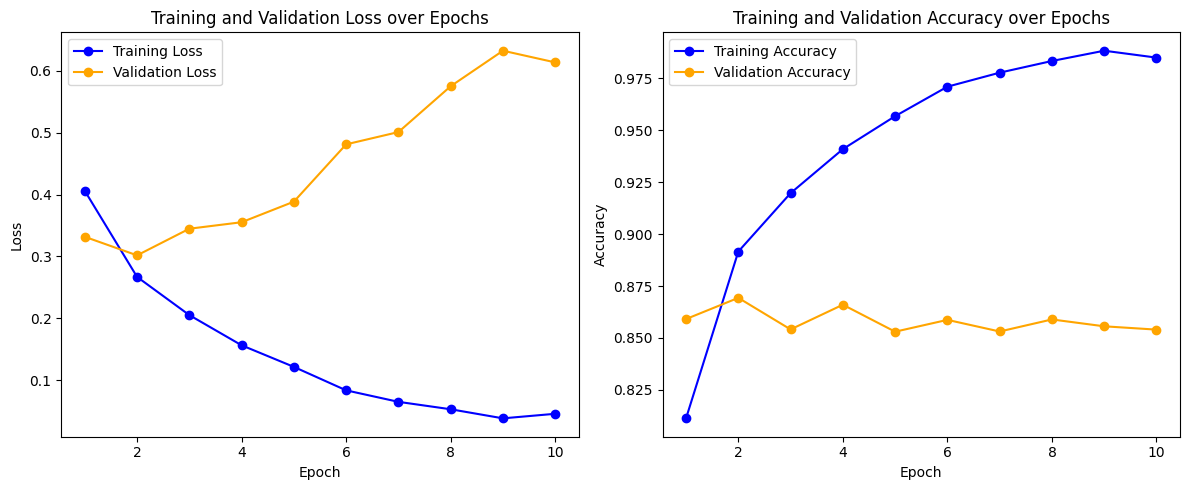

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 10 + 1), train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(range(1, 10 + 1), val_loss, label='Validation Loss', color='orange', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 10 + 1), train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(range(1, 10 + 1), val_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.8533 - loss: 0.6242


In [30]:
def predict_sentiment(text, model, tokenizer, max_len=200):
    # Preprocess and tokenize the text
    tokenized = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(tokenized, maxlen=max_len)
    
    # Predict sentiment
    prediction = model.predict(padded)
    sentiment = "Positive" if prediction[0] > 0.5 else "Negative"
    return sentiment

# Example usage
text = "I really enjoyed the movie!"
print(predict_sentiment(text, model, tokenizer))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step
Negative
